## Regresión Logística para predicciones bancarias

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
data = pd.read_csv("/Users/Luis Antonio Garza/Python proyectos/python-ml-course-master/datasets/bank/bank.csv", sep = ";")

In [151]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [152]:
data.shape # revisamos el tamaño

(4119, 21)

In [153]:
# nombre de columnas
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [154]:
data["y"] = (data["y"] == "yes").astype(int)

In [155]:
data.tail(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4099,58,admin.,divorced,high.school,no,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
4100,41,admin.,divorced,high.school,no,no,no,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4101,35,entrepreneur,single,university.degree,no,yes,no,cellular,jul,mon,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
4102,31,blue-collar,single,basic.9y,unknown,no,yes,telephone,jun,fri,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4103,43,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4104,42,technician,divorced,professional.course,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,0
4105,47,housemaid,married,basic.4y,unknown,yes,no,telephone,jul,tue,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
4106,45,entrepreneur,divorced,basic.9y,no,yes,no,cellular,may,tue,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,0
4107,36,admin.,married,university.degree,unknown,yes,no,cellular,aug,wed,...,11,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
4108,32,admin.,married,university.degree,no,yes,no,telephone,may,thu,...,5,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,0


In [156]:
data["education"].unique() # sacamos las categorias existentes en education

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [157]:
# Convertimos las categorias a una sola categoria (data cleaning)

data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [158]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [159]:
data["y"].value_counts()
# 1 significa venta realizada

0    3668
1     451
Name: y, dtype: int64

In [160]:
# análisis exploratorio
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [161]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

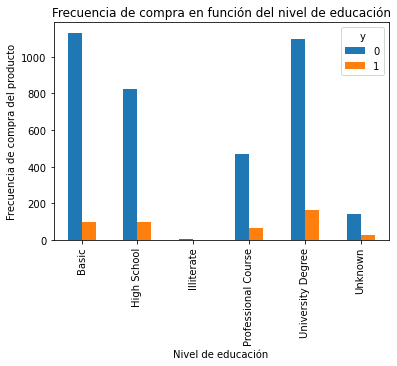

In [162]:
# Visualización de los datos - exploratorio - Compra realizada vs educación

%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporcion de clientes')

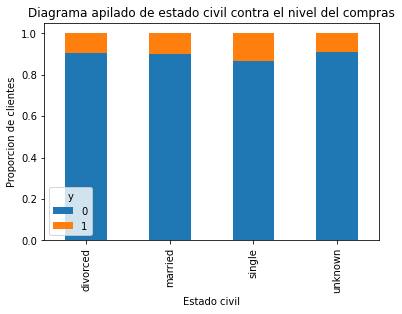

In [163]:
# Visualización de datos exploratorio - Compra realizada vs estado civil

table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked = True)
plt.title("Diagrama apilado de estado civil contra el nivel del compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporcion de clientes")

Text(0, 0.5, 'Frecuencia de compra de producto')

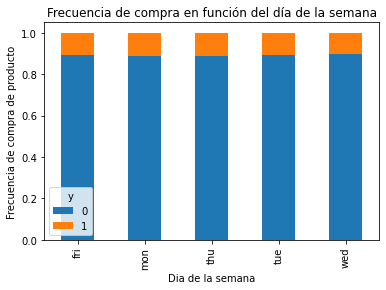

In [164]:
# Visualización de datos exploratorio - Compra realizada vs dias de la semana

table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked = True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de compra de producto")

Text(0, 0.5, 'Frecuencia de compra de producto')

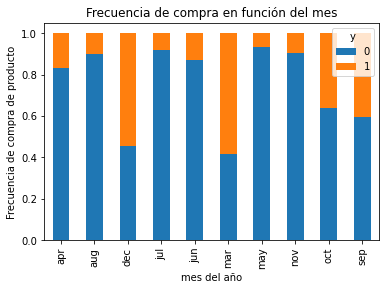

In [165]:
# Visualización de datos exploratorio - Compra realizada vs mes

table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked = True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("mes del año")
plt.ylabel("Frecuencia de compra de producto")

Text(0, 0.5, 'Frecuencia de compra de producto')

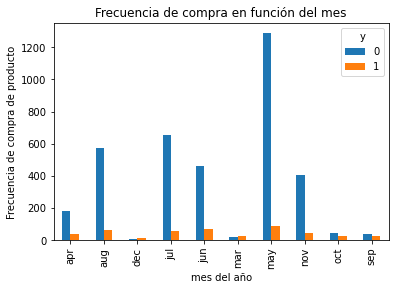

In [166]:
# Visualización de datos exploratorio - Compra realizada vs mes

table = pd.crosstab(data.month, data.y)
table.plot(kind="bar", stacked=False)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("mes del año")
plt.ylabel("Frecuencia de compra de producto")

Text(0, 0.5, 'Cliente')

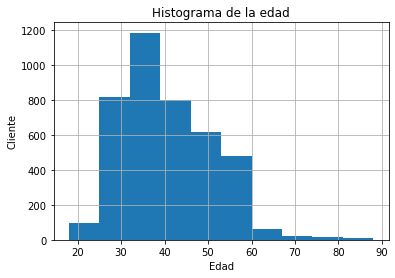

In [167]:
# Visualización de datos exploratorio - Compra realizada vs edad

data.age.hist()
plt.title("Histograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

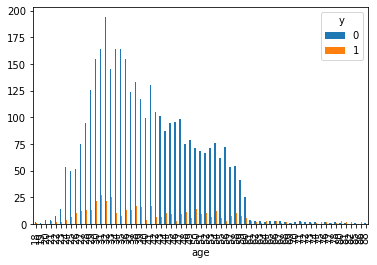

In [168]:
table = pd.crosstab(data.age, data.y).plot(kind="bar")

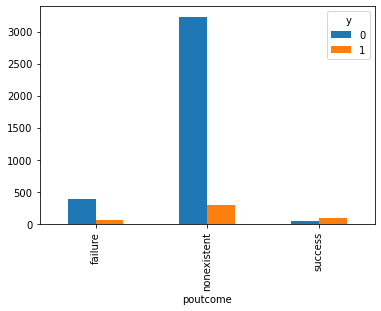

In [169]:
# Visualización de datos exploratorio - Compra realizada vs experiencia o resultado

table = pd.crosstab(data.poutcome, data.y).plot(kind="bar")

## Conversión de las variables categoricas a dummies

In [170]:
categories = ["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [171]:
data_vars=data.columns.values.tolist()

In [172]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [173]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [174]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

## Selección de rasgos para el modelo

In [175]:
n = 12


In [176]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [177]:
lr = LogisticRegression()

In [178]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

C:\DataSciencePython\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\DataSciencePython\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\DataSciencePython\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

C:\DataSciencePython\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\DataSciencePython\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [179]:
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
 False False False False False False False  True False  True]


In [180]:
print(rfe.ranking_)

[38 40 18 45  1 17 26 22  1 34  2  8  5 37  7  1  6 24 42  1  1 41 15 28
 27 47 31 12 46 19 30  4  9 14 43 13 20 33 11  3 36 21  1  1  1  1  1 23
 32 44 39 25 29 35 10  1 16  1]


In [182]:
z=zip(bank_data_vars,rfe.support_, rfe.ranking_)

In [183]:
list(z)

[('age', False, 38),
 ('duration', False, 40),
 ('campaign', False, 18),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 17),
 ('cons.price.idx', False, 26),
 ('cons.conf.idx', False, 22),
 ('euribor3m', True, 1),
 ('nr.employed', False, 34),
 ('y', False, 2),
 ('job_admin.', False, 8),
 ('job_blue-collar', False, 5),
 ('job_entrepreneur', False, 37),
 ('job_housemaid', False, 7),
 ('job_management', True, 1),
 ('job_retired', False, 6),
 ('job_self-employed', False, 24),
 ('job_services', False, 42),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('job_unemployed', False, 41),
 ('job_unknown', False, 15),
 ('marital_divorced', False, 28),
 ('marital_married', False, 27),
 ('marital_single', False, 47),
 ('marital_unknown', False, 31),
 ('education_Basic', False, 12),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 19),
 ('education_Professional Course', False, 30),
 ('education_University Degree', False, 4),
 ('education_Unkno

In [184]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

In [185]:
X = bank_data[cols]
Y = bank_data["y"]

### Implementación del modelo en Pthon con statsmodel api

In [186]:
import statsmodels.api as sm

In [187]:
logit_model = sm.Logit(Y, X) # (variable a predecir, variables predictoras)

In [189]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [190]:
result.summary2()

# DF model --> grados de libertad : variables importantes 12 - 1
# DF residuals --> observaciones - DF model
# AIC y BIC son para comprar el rendimiento de un modelo

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2023-01-04 15:22  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

Las variables más significativas tendrán el P valor más pequeño

### Implementación del modelo en Python con scikit-learn

In [191]:
from sklearn import linear_model

In [193]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y) # (dependientes, predecir)

LogisticRegression()

In [194]:
logit_model.score(X,Y)

0.8958485069191552

In [196]:
1 - Y.mean() # --> predecimos quien no compra

0.8905074047098811

In [197]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5362541179381827]
1,euribor3m,[-0.5443670397997274]
2,job_blue-collar,[-0.3533138743501009]
3,job_retired,[0.361651590811015]
4,month_aug,[0.6292588895077266]
5,month_dec,[1.1943974572122087]
6,month_jul,[0.9630554140671219]
7,month_jun,[1.0566897056472608]
8,month_mar,[1.6386680234595017]
9,month_nov,[0.4577084191062177]


### Validación del modelo logístico

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [201]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [206]:
from IPython.display import display, Math, Latex

In [207]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p>0.5\end{cases}'))

<IPython.core.display.Math object>

In [202]:
probs = lm.predict_proba(X_test) # probabilidad estandar del conjunto de datos

In [203]:
probs 

# [probabilidad, probabilidad de valor de salida (compra o no compra)]

array([[0.95409621, 0.04590379],
       [0.83896646, 0.16103354],
       [0.93216535, 0.06783465],
       ...,
       [0.65098445, 0.34901555],
       [0.97381005, 0.02618995],
       [0.57635748, 0.42364252]])

In [204]:
prediction =  lm.predict(X_test)

In [205]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [208]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p>0.5\end{cases}'))

<IPython.core.display.Math object>

In [209]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1,0)
prob_df.head()

,0,prediction
0,0.045904,0
1,0.161034,1
2,0.067835,0
3,0.062222,0
4,0.042308,0


In [210]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [211]:
390 / len(prob_df)*100

31.55339805825243

In [213]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,504
1,732


In [214]:
732/len(prob_df)*100

59.22330097087378

In [216]:
from sklearn import metrics

In [217]:
metrics.accuracy_score(Y_test, prediction)

0.901294498381877

subimos un poco el rendimiento del modelo 

0.89584 vs 0.901294

### Validación cruzada

se usa cuando hacemos una prediccion y queremos comprobar el modelo buscando problemas de overfitting 

In [219]:
from sklearn.model_selection import cross_val_score

In [229]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring = "accuracy", cv = 10)

In [230]:
scores

array([0.90533981, 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89320388, 0.88807786])

In [231]:
scores.mean()

0.8943903101599225

### matrices de confusión y curvas ROC

In [232]:
Xtrain, Xtest, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [234]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [235]:
probs = lm.predict_proba(X_test)

In [236]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df["actual"] = list(Y_test) # lo hacemos list para eliminar los registros antiguos
prob_df

,0,prediction,actual
0,0.045904,0,0
1,0.161034,1,0
2,0.067835,0,0
3,0.062222,0,0
4,0.042308,0,0
...,...,...,...
1231,0.062222,0,0
1232,0.062157,0,0
1233,0.349016,1,0
1234,0.026190,0,0


In [237]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [239]:
 # imprimimos la matriz de confusión
    
    
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]

In [241]:
sens = TP/(TP+FN)
sens

0.21025641025641026

In [242]:
espc_1 = 1 - TN/(TN+FP)
espc_1

0.047281323877068515

In [243]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [244]:
sensitivities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6229508196721312,
 0.5163934426229508,
 0.45081967213114754,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.12295081967213115,
 0]

In [245]:
especifities_1

[1,
 0.7800718132854578,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.21992818671454217,
 0.12387791741472176,
 0.08617594254937166,
 0.07181328545780974,
 0.06463195691202872,
 0.022441651705565557,
 0.013464991023339312,
 0]

In [246]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

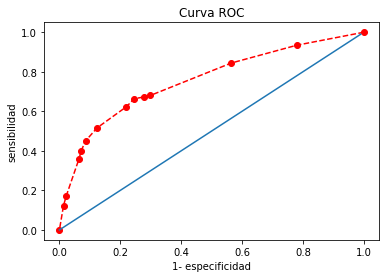

In [247]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1- especificidad")
plt.ylabel("sensibilidad")
plt.title("Curva ROC")

In [249]:
from sklearn import metrics
import ggplot 

ModuleNotFoundError: No module named 'ggplot'

### Resumen

* La regresión lineal no sirve para predecir variables binarias, ya que el rango es de numeros reales.
* El cociente de probabilidades de un suceso crece cuanto más probable es que ocurra el suceso.
* La regresión logistica viene modelada por ln(p/1-p) = alpha + sumatoria de k i=1, Bi * Xi
* Para estimar los coeficientes usamos la técnica de la máxima verosimilidad y el algoritmo de newton-raphson
* En el contraste de hipotesis de cada p-valor, cuanto más pequeño es más significatividad tiene la variable para el modelo
* Se puede validar el modelo con la técnica de k-fold CV
* Marcar el umbral de decisión del modelo afecta a su eficiencia y sensibilidad
* La eficacia del modelo se mide con una curva de ROC

In [ ]:
0